In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
import cv2
from sklearn.utils import shuffle

# 증강X

In [ ]:
# 증강x, baseline
def load_images_and_labels(data_dir):
    images = []
    labels = []

    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 이미지를 RGB 형식으로 변환
                img = cv2.resize(img, (128, 128))  # 이미지 크기 조절

                # 이미지 데이터를 리스트에 추가
                images.append(img)
                # 레이블을 리스트에 추가
                labels.append(folder_name)

    return shuffle(images, labels, random_state=42)


# 랜덤으로 하나의 증강 적용

In [ ]:
# 랜덤 증강o +
import os
import cv2
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

def load_images_and_labels(data_dir):
    images = []
    labels = []

    # 랜덤으로 선택할 증강 리스트
    augmentation_options = [
        {'name': 'rotation', 'param': 40},
        {'name': 'width_shift', 'param': 0.2},
        {'name': 'height_shift', 'param': 0.2},
        {'name': 'shear', 'param': 0.2},
        {'name': 'zoom', 'param': 0.2},
        {'name': 'horizontal_flip', 'param': True},
        {'name': 'brightness', 'param': None},
        {'name': 'contrast', 'param': None},
        {'name': 'color', 'param': None},
        {'name': 'gaussian_blur', 'param': None},
        ]

    # 데이터 증강을 위한 ImageDataGenerator 정의
    datagen = ImageDataGenerator()

    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (128, 128))

                # 원본 이미지를 리스트에 추가
                images.append(img)
                labels.append(folder_name)

                # 랜덤으로 선택한 증강 옵션을 적용
                selected_augmentations = random.sample(augmentation_options, k=random.randint(0, len(augmentation_options)))
                for aug_option in selected_augmentations:
                    if aug_option['name'] == 'rotation':
                        img = ImageDataGenerator(rotation_range=aug_option['param']).random_transform(img)
                    elif aug_option['name'] == 'width_shift':
                        img = ImageDataGenerator(width_shift_range=aug_option['param']).random_transform(img)
                    elif aug_option['name'] == 'height_shift':
                        img = ImageDataGenerator(height_shift_range=aug_option['param']).random_transform(img)
                    elif aug_option['name'] == 'shear':
                        img = ImageDataGenerator(shear_range=aug_option['param']).random_transform(img)
                    elif aug_option['name'] == 'zoom':
                        img = ImageDataGenerator(zoom_range=aug_option['param']).random_transform(img)
                    elif aug_option['name'] == 'horizontal_flip':
                        img = ImageDataGenerator(horizontal_flip=aug_option['param']).random_transform(img)
                    elif aug_option['name'] == 'brightness':
                        img = ImageDataGenerator(brightness_range=(0.5, 1.5)).random_transform(img)
                    elif aug_option['name'] == 'contrast':
                        img = ImageDataGenerator(channel_shift_range=50).random_transform(img)
                    elif aug_option['name'] == 'color':
                        img = ImageDataGenerator().random_transform(img)
                    elif aug_option['name'] == 'gaussian_blur':
                        sigma = random.uniform(0.1, 2.0)
                        img = cv2.GaussianBlur(img, (0, 0), sigma)

                    # 증강된 이미지를 리스트에 추가
                    images.append(img)
                    labels.append(folder_name)

    return shuffle(images, labels, random_state=42)

# Learning Curve 그리는 코드

In [ ]:
def plot_learning_curve(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss starting from Epoch 50
    plt.subplot(1, 2, 2)
    start_epoch = 50  # Specify the starting epoch

    train_loss = history.history['loss'][start_epoch:]
    val_loss = history.history['val_loss'][start_epoch:]

    epochs = range(start_epoch, start_epoch + len(train_loss))

    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



# Baseline / 증강 X

Epoch 1/100
15/15 [==============================] - 25s 436ms/step - loss: 3.3874 - accuracy: 0.5930 - val_loss: 191238332296986624.0000 - val_accuracy: 0.6638
Epoch 2/100
15/15 [==============================] - 3s 231ms/step - loss: 0.6235 - accuracy: 0.6670 - val_loss: 19304491778048.0000 - val_accuracy: 0.6638
Epoch 3/100
15/15 [==============================] - 3s 232ms/step - loss: 0.8030 - accuracy: 0.7134 - val_loss: 111838453760.0000 - val_accuracy: 0.6638
Epoch 4/100
15/15 [==============================] - 3s 231ms/step - loss: 0.5808 - accuracy: 0.7070 - val_loss: 361638080.0000 - val_accuracy: 0.6638
Epoch 5/100
15/15 [==============================] - 3s 233ms/step - loss: 0.5021 - accuracy: 0.7624 - val_loss: 4668612.5000 - val_accuracy: 0.6638
Epoch 6/100
15/15 [==============================] - 3s 234ms/step - loss: 0.4356 - accuracy: 0.8077 - val_loss: 224401.4688 - val_accuracy: 0.6638
Epoch 7/100
15/15 [==============================] - 4s 235ms/step - loss: 0.3873

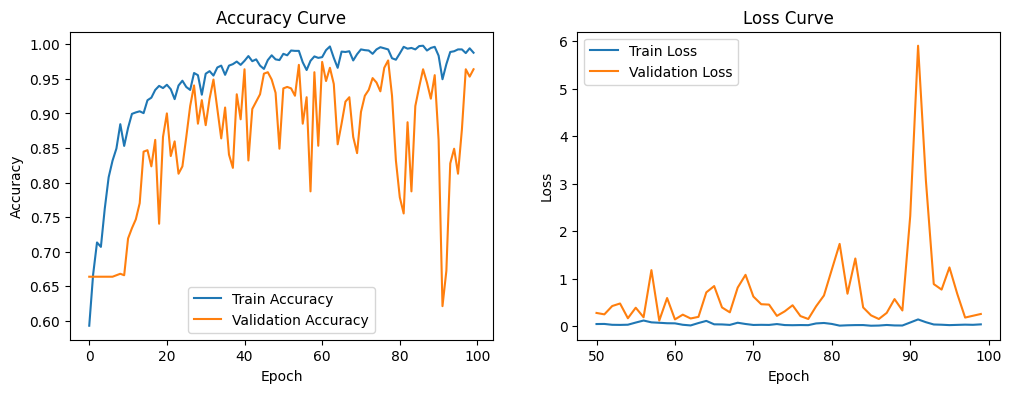

Epoch 1/100
15/15 [==============================] - 23s 300ms/step - loss: 1.7736 - accuracy: 0.5988 - val_loss: 1495250585518080.0000 - val_accuracy: 0.7106
Epoch 2/100
15/15 [==============================] - 3s 230ms/step - loss: 0.6030 - accuracy: 0.6654 - val_loss: 567231119360.0000 - val_accuracy: 0.7106
Epoch 3/100
15/15 [==============================] - 3s 231ms/step - loss: 0.5517 - accuracy: 0.6654 - val_loss: 840754944.0000 - val_accuracy: 0.7106
Epoch 4/100
15/15 [==============================] - 3s 233ms/step - loss: 0.4953 - accuracy: 0.7128 - val_loss: 13891294.0000 - val_accuracy: 0.7106
Epoch 5/100
15/15 [==============================] - 3s 234ms/step - loss: 0.4737 - accuracy: 0.7112 - val_loss: 824369.5000 - val_accuracy: 0.7106
Epoch 6/100
15/15 [==============================] - 4s 236ms/step - loss: 0.4447 - accuracy: 0.7800 - val_loss: 94899.8125 - val_accuracy: 0.7106
Epoch 7/100
15/15 [==============================] - 4s 237ms/step - loss: 0.4127 - accurac

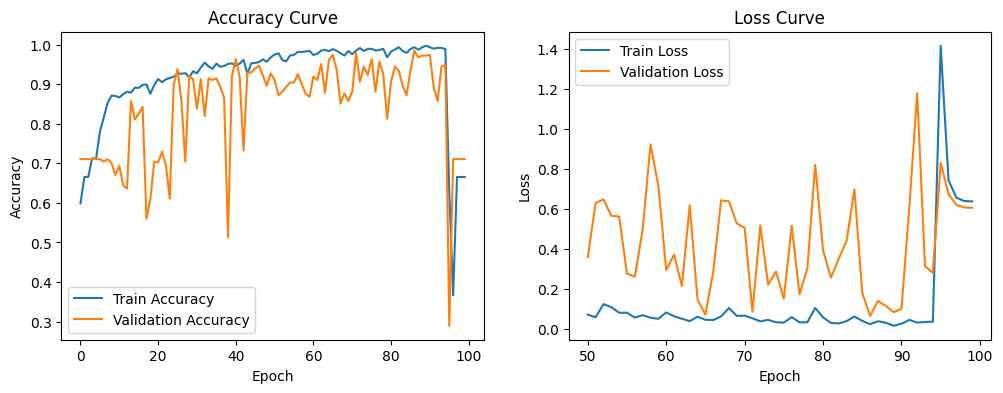

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
# 이거다!!!, ResNet 직접 구현
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.optimizers import Adam, AdamW

# 데이터 불러오기
data_dir = "/content/drive/MyDrive/Colab Notebooks/DL_teamproject_data"
X, y = load_images_and_labels(data_dir)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)  # 클래스 개수에 따라 수정

# 이미지 데이터를 전처리
X = np.array(X)
y = np.array(y)

# K-fold 교차 검증을 위한 K 값 설정
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 함수
def identity_block(x, filters, kernel_size=3, stride=1):
    # Identity block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def conv_block(x, filters, kernel_size=3, stride=2):
    # Convolutional block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def create_resnet_model(input_shape=(128, 128, 3), num_classes=2):
    # ResNet-50 architecture
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, stride=1)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = AveragePooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model
    model.compile(optimizer=AdamW(learning_rate = 0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# 전체 k-fold에 대한 accuracy를 저장할 리스트
all_accuracies = []

# K-fold 교차 검증 수행
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_resnet_model()

    # 모델 훈련
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {np.mean(eval_result[0])}, Test Accuracy: {np.mean(eval_result[1])}")

    plot_learning_curve(history)

    # 평가 결과를 리스트에 추가
    all_accuracies.append(eval_result[1])

# 전체 k-fold에 대한 평균 accuracy 계산
average_accuracy = np.mean(all_accuracies)
print(f"\nAverage Accuracy Across All Folds: {average_accuracy}")

# Baseline / early stopping

Epoch 1/100
15/15 [==============================] - 25s 403ms/step - loss: 1.9295 - accuracy: 0.6492 - val_loss: 29073159760117760.0000 - val_accuracy: 0.7269
Epoch 2/100
15/15 [==============================] - 3s 226ms/step - loss: 0.5920 - accuracy: 0.6988 - val_loss: 23455642681344.0000 - val_accuracy: 0.7269
Epoch 3/100
15/15 [==============================] - 3s 225ms/step - loss: 0.5594 - accuracy: 0.6988 - val_loss: 21684285440.0000 - val_accuracy: 0.7269
Epoch 4/100
15/15 [==============================] - 3s 227ms/step - loss: 0.5612 - accuracy: 0.6988 - val_loss: 280126240.0000 - val_accuracy: 0.7269
Epoch 5/100
15/15 [==============================] - 3s 227ms/step - loss: 1.1020 - accuracy: 0.6988 - val_loss: 58969840.0000 - val_accuracy: 0.7269
Epoch 6/100
15/15 [==============================] - 3s 227ms/step - loss: 0.6151 - accuracy: 0.6988 - val_loss: 1261286.1250 - val_accuracy: 0.7269
Epoch 7/100
15/15 [==============================] - 3s 226ms/step - loss: 0.7004

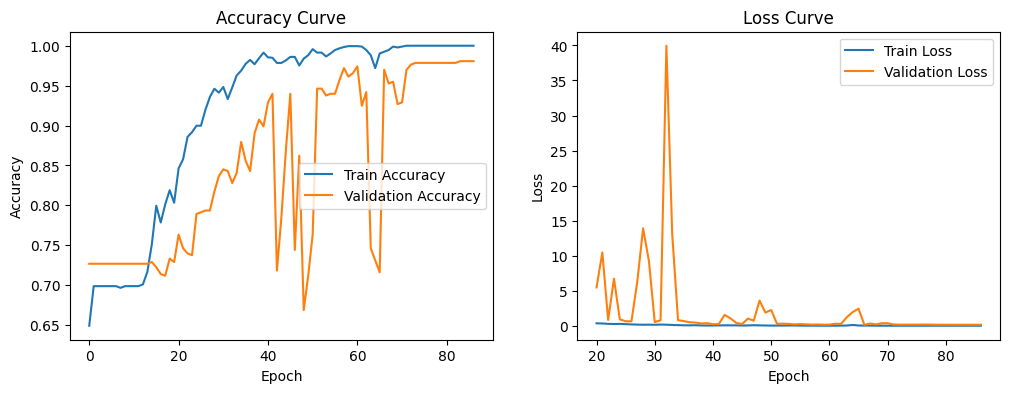

Epoch 1/100
15/15 [==============================] - 26s 421ms/step - loss: 5.5472 - accuracy: 0.6807 - val_loss: 254967417812287488.0000 - val_accuracy: 0.6961
Epoch 2/100
15/15 [==============================] - 3s 230ms/step - loss: 1.4331 - accuracy: 0.7065 - val_loss: 1704051474432.0000 - val_accuracy: 0.3039
Epoch 3/100
15/15 [==============================] - 3s 232ms/step - loss: 1.2483 - accuracy: 0.7022 - val_loss: 128850960.0000 - val_accuracy: 0.6961
Epoch 4/100
15/15 [==============================] - 3s 232ms/step - loss: 0.7819 - accuracy: 0.7065 - val_loss: 202496.2031 - val_accuracy: 0.6961
Epoch 5/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5447 - accuracy: 0.7065 - val_loss: 0.6788 - val_accuracy: 0.6961
Epoch 6/100
15/15 [==============================] - 3s 226ms/step - loss: 0.5281 - accuracy: 0.7065 - val_loss: 0.7235 - val_accuracy: 0.6961
Epoch 7/100
15/15 [==============================] - 3s 227ms/step - loss: 0.5170 - accuracy: 0.707

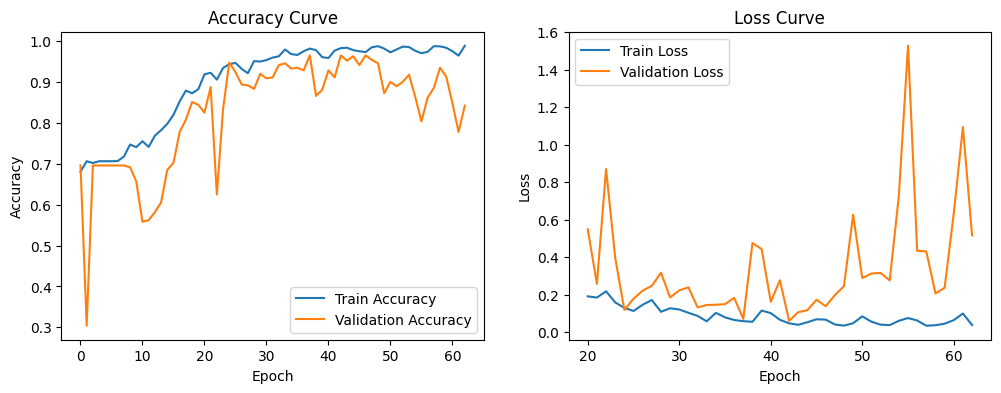

Epoch 1/100
15/15 [==============================] - 22s 307ms/step - loss: 4.5363 - accuracy: 0.6936 - val_loss: 13892068497686528.0000 - val_accuracy: 0.7328
Epoch 2/100
15/15 [==============================] - 3s 230ms/step - loss: 0.7413 - accuracy: 0.6974 - val_loss: 1604516052992.0000 - val_accuracy: 0.7328
Epoch 3/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5659 - accuracy: 0.6974 - val_loss: 3364731392.0000 - val_accuracy: 0.7328
Epoch 4/100
15/15 [==============================] - 3s 231ms/step - loss: 0.5596 - accuracy: 0.6974 - val_loss: 17451944.0000 - val_accuracy: 0.7328
Epoch 5/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5434 - accuracy: 0.6974 - val_loss: 560432.5000 - val_accuracy: 0.7328
Epoch 6/100
15/15 [==============================] - 3s 231ms/step - loss: 0.5385 - accuracy: 0.6974 - val_loss: 56316.7031 - val_accuracy: 0.7328
Epoch 7/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5096 - accu

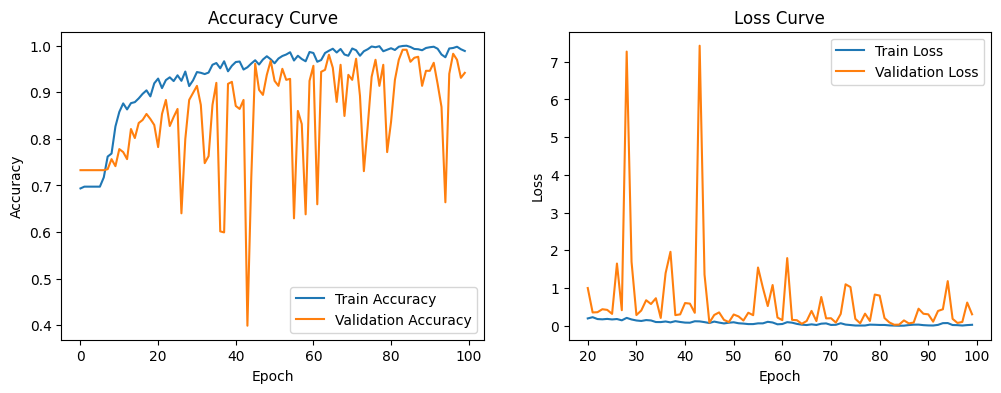

Epoch 1/100
15/15 [==============================] - 23s 309ms/step - loss: 4.3373 - accuracy: 0.6187 - val_loss: 30432338668158976.0000 - val_accuracy: 0.6983
Epoch 2/100
15/15 [==============================] - 3s 234ms/step - loss: 0.7419 - accuracy: 0.7049 - val_loss: 40017489920.0000 - val_accuracy: 0.6983
Epoch 3/100
15/15 [==============================] - 3s 234ms/step - loss: 0.5764 - accuracy: 0.7044 - val_loss: 77254248.0000 - val_accuracy: 0.6983
Epoch 4/100
15/15 [==============================] - 3s 234ms/step - loss: 0.4849 - accuracy: 0.7103 - val_loss: 796815.5000 - val_accuracy: 0.6983
Epoch 5/100
15/15 [==============================] - 4s 235ms/step - loss: 0.4210 - accuracy: 0.7927 - val_loss: 21965.3398 - val_accuracy: 0.6983
Epoch 6/100
15/15 [==============================] - 3s 234ms/step - loss: 0.3706 - accuracy: 0.8374 - val_loss: 3515.2114 - val_accuracy: 0.3017
Epoch 7/100
15/15 [==============================] - 4s 236ms/step - loss: 0.3296 - accuracy: 0.

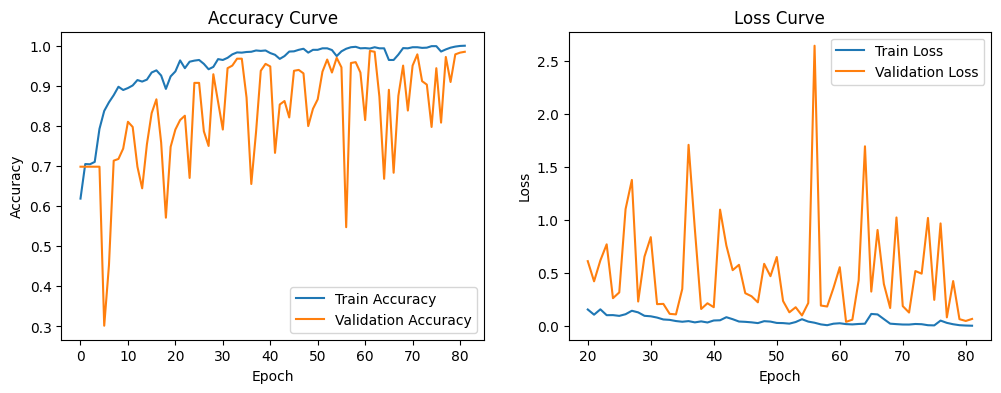

Epoch 1/100
15/15 [==============================] - 24s 307ms/step - loss: 3.8757 - accuracy: 0.6602 - val_loss: 201475730444386304.0000 - val_accuracy: 0.6681
Epoch 2/100
15/15 [==============================] - 3s 231ms/step - loss: 0.8061 - accuracy: 0.7135 - val_loss: 1921319305216.0000 - val_accuracy: 0.6681
Epoch 3/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5952 - accuracy: 0.7135 - val_loss: 8586740224.0000 - val_accuracy: 0.6681
Epoch 4/100
15/15 [==============================] - 3s 231ms/step - loss: 0.5488 - accuracy: 0.7135 - val_loss: 96230112.0000 - val_accuracy: 0.6681
Epoch 5/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5354 - accuracy: 0.7135 - val_loss: 5814449.0000 - val_accuracy: 0.6681
Epoch 6/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5330 - accuracy: 0.7146 - val_loss: 1234219.2500 - val_accuracy: 0.6681
Epoch 7/100
15/15 [==============================] - 3s 232ms/step - loss: 0.5452 - 

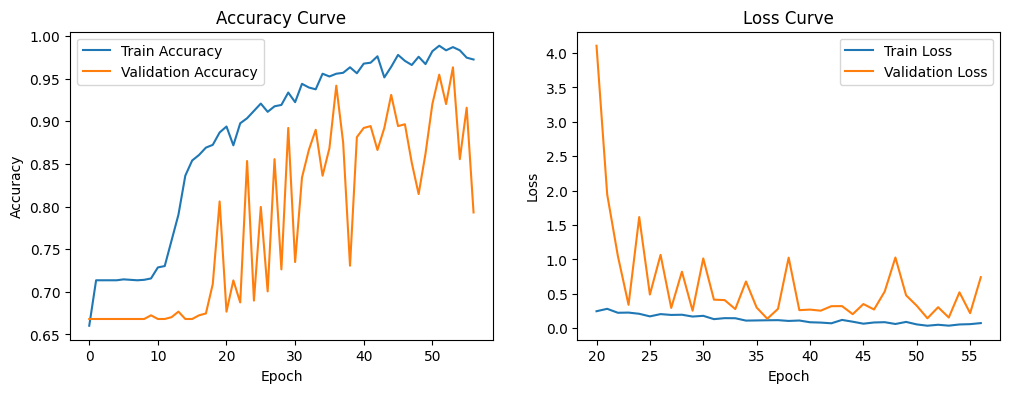


Average Accuracy Across All Folds: 0.9612198829650879


In [ ]:
# 이거다!!!, ResNet 직접 구현, early stopping 포함
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.optimizers import AdamW
from keras.callbacks import EarlyStopping

# 데이터 불러오기
data_dir = "/content/drive/MyDrive/Colab Notebooks/DL_teamproject_data"
X, y = load_images_and_labels(data_dir)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)  # 클래스 개수에 따라 수정

# 이미지 데이터를 전처리
X = np.array(X)
y = np.array(y)

# K-fold 교차 검증을 위한 K 값 설정
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 함수
def identity_block(x, filters, kernel_size=3, stride=1):
    # Identity block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def conv_block(x, filters, kernel_size=3, stride=2):
    # Convolutional block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def create_resnet_model(input_shape=(128, 128, 3), num_classes=2):
    # ResNet-50 architecture
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, stride=1)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = AveragePooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='sigmoid')(x)

    """
    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model
    model.compile(optimizer=AdamW(learning_rate = 0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=Adam( ), loss='binary_crossentropy', metrics=['accuracy'])

    return model
    """
    # Early stopping 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model with AdamW optimizer and binary crossentropy loss
    model.compile(optimizer=AdamW(learning_rate=0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model, early_stopping


# 전체 k-fold에 대한 accuracy를 저장할 리스트
all_accuracies = []

# K-fold 교차 검증 수행
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 모델 생성 함수와 EarlyStopping 콜백을 받도록 수정
    model, early_stopping = create_resnet_model()

    # 모델 훈련 시 EarlyStopping 콜백을 추가
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

    plot_learning_curve(history)

    """
    model = create_resnet_model()

    # 모델 훈련
    model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {np.mean(eval_result[0])}, Test Accuracy: {np.mean(eval_result[1])}")
    """

    # 평가 결과를 리스트에 추가
    all_accuracies.append(eval_result[1])

# 전체 k-fold에 대한 평균 accuracy 계산
average_accuracy = np.mean(all_accuracies)
print(f"\nAverage Accuracy Across All Folds: {average_accuracy}")

# Class Weight

In [ ]:
# 이거다!!!, ResNet 직접 구현
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.optimizers import Adam, AdamW

# 데이터 불러오기
data_dir = "/content/drive/MyDrive/Colab Notebooks/finalproject_dataset"
X, y = load_images_and_labels(data_dir)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)  # 클래스 개수에 따라 수정

# 이미지 데이터를 전처리
X = np.array(X)
y = np.array(y)

# K-fold 교차 검증을 위한 K 값 설정
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 함수
def identity_block(x, filters, kernel_size=3, stride=1):
    # Identity block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def conv_block(x, filters, kernel_size=3, stride=2):
    # Convolutional block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def create_resnet_model(input_shape=(128, 128, 3), num_classes=2):
    # ResNet-50 architecture
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, stride=1)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = AveragePooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model
    model.compile(optimizer=AdamW(learning_rate = 0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=Adam( ), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# 전체 k-fold에 대한 accuracy를 저장할 리스트
all_accuracies = []

# K-fold 교차 검증 수행
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_resnet_model()

    class_weight = {0: 0.15, 1: 0.85}

    # 모델 훈련
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), class_weight=class_weight)

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {np.mean(eval_result[0])}, Test Accuracy: {np.mean(eval_result[1])}")

    plot_learning_curve(history)

    # 평가 결과를 리스트에 추가
    all_accuracies.append(eval_result[1])

# 전체 k-fold에 대한 평균 accuracy 계산
average_accuracy = np.mean(all_accuracies)
print(f"\nAverage Accuracy Across All Folds: {average_accuracy}")

# Upsampling by SMOTE

In [ ]:
import imblearn
import matplotlib.pyplot as plt
from numpy import where
from imblearn.over_sampling import SMOTE

In [ ]:
# 이거다!!!, ResNet 직접 구현
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.optimizers import Adam, AdamW

# 데이터 불러오기
data_dir = "/content/drive/MyDrive/Colab Notebooks/finalproject_dataset"
X, y = load_images_and_labels(data_dir)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)  # 클래스 개수에 따라 수정

# 이미지 데이터를 전처리
X = np.array(X)
y = np.array(y)

X_flatten = X.reshape(X.shape[0], -1)

# Apply SMOTE
smt = SMOTE()
X_new, y_new = smt.fit_resample(X_flatten, y)

X_new_reshaped = X_new.reshape(X_new.shape[0], 128, 128, 3)

# K-fold 교차 검증을 위한 K 값 설정
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 함수
def identity_block(x, filters, kernel_size=3, stride=1):
    # Identity block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def conv_block(x, filters, kernel_size=3, stride=2):
    # Convolutional block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def create_resnet_model(input_shape=(128, 128, 3), num_classes=2):
    # ResNet-50 architecture
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, stride=1)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = AveragePooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model
    model.compile(optimizer=AdamW(learning_rate = 0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=Adam( ), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# 전체 k-fold에 대한 accuracy를 저장할 리스트
all_accuracies = []

# K-fold 교차 검증 수행
for train_index, test_index in k_fold.split(X_new_reshaped):
    X_train, X_test = X_new_reshaped[train_index], X_new_reshaped[test_index]
    y_train, y_test = y_new[train_index], y_new[test_index]

    model = create_resnet_model()


    # 모델 훈련
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {np.mean(eval_result[0])}, Test Accuracy: {np.mean(eval_result[1])}")

    plot_learning_curve(history)

    # 평가 결과를 리스트에 추가
    all_accuracies.append(eval_result[1])

# 전체 k-fold에 대한 평균 accuracy 계산
average_accuracy = np.mean(all_accuracies)
print(f"\nAverage Accuracy Across All Folds: {average_accuracy}")

early stopping 포함

In [ ]:
# 이거다!!!, ResNet 직접 구현, early stopping 포함
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.optimizers import AdamW
from keras.callbacks import EarlyStopping

# 데이터 불러오기
data_dir = "/content/drive/MyDrive/Colab Notebooks/DL_teamproject_data"
X, y = load_images_and_labels(data_dir)

# 레이블 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=2)  # 클래스 개수에 따라 수정

# 이미지 데이터를 전처리
X = np.array(X)
y = np.array(y)

# K-fold 교차 검증을 위한 K 값 설정
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 생성 함수
def identity_block(x, filters, kernel_size=3, stride=1):
    # Identity block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    if stride != 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def conv_block(x, filters, kernel_size=3, stride=2):
    # Convolutional block for ResNet-50
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)

    x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)

    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

def create_resnet_model(input_shape=(128, 128, 3), num_classes=2):
    # ResNet-50 architecture
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, stride=1)
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    x = conv_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)
    x = identity_block(x, 128)

    x = conv_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)
    x = identity_block(x, 256)

    x = conv_block(x, 512)
    x = identity_block(x, 512)
    x = identity_block(x, 512)

    x = AveragePooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='sigmoid')(x)

    """
    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model
    model.compile(optimizer=AdamW(learning_rate = 0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=Adam( ), loss='binary_crossentropy', metrics=['accuracy'])

    return model
    """
    # Early stopping 콜백 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    model = Model(inputs=input_tensor, outputs=x)

    # Compile the model with AdamW optimizer and binary crossentropy loss
    model.compile(optimizer=AdamW(learning_rate=0.01, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model, early_stopping


# 전체 k-fold에 대한 accuracy를 저장할 리스트
all_accuracies = []

# K-fold 교차 검증 수행
for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 모델 생성 함수와 EarlyStopping 콜백을 받도록 수정
    model, early_stopping = create_resnet_model()

    # 모델 훈련 시 EarlyStopping 콜백을 추가
    history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")

    """
    model = create_resnet_model()

    # 모델 훈련
    model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

    # 모델 평가
    eval_result = model.evaluate(X_test, y_test)
    print(f"Test Loss: {np.mean(eval_result[0])}, Test Accuracy: {np.mean(eval_result[1])}")
    """

    # 평가 결과를 리스트에 추가
    all_accuracies.append(eval_result[1])

# 전체 k-fold에 대한 평균 accuracy 계산
average_accuracy = np.mean(all_accuracies)
print(f"\nAverage Accuracy Across All Folds: {average_accuracy}")